In [3]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pprint

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score, cross_val_predict
from scikeras.wrappers import KerasRegressor


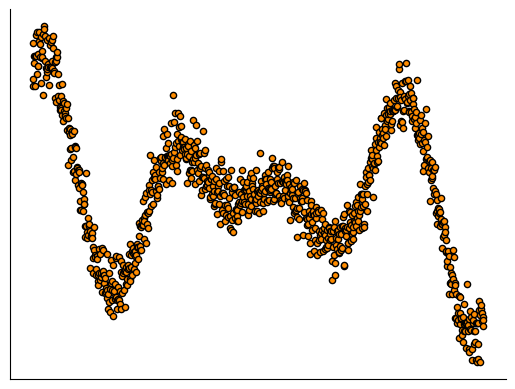

In [15]:
#Random data set generation & plot

np.random.seed(30) #Fix the randomness
X = np.linspace(-10, 10, num=1000)
y = 0.1*X*np.cos(X) + 0.1*np.random.normal(size=1000)


X = X.reshape(-1,1)
y = y.reshape(-1,1)

y = y.ravel()

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.tick_params(labelsize=14)
sns.despine()
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
#Generate train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [17]:
#Model definition
def buildmodel():
  model = Sequential()
  model.add(Dense(132, activation ='relu',input_dim = 1, input_shape = [1], kernel_regularizer=l2(0.01)))
  model.add(Dense(64))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam',
                metrics=['mean_absolute_error'])
  return(model)

In [28]:
#Define K-fold cross validator
cv = KFold(n_splits = 2, shuffle = True, random_state = 42)
estimator = KerasRegressor(build_fn = buildmodel, batch_size=128, verbose=1, epochs=1000)

25/25 [==============================] - 0s 574us/step
Epoch 1/1000


C:\Users\cnapo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 [==============================] - 1s 613ms/step - loss: 0.7333 - mean_absolute_error: 0.6205
Epoch 2/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2676 - mean_absolute_error: 0.3528
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2410 - mean_absolute_error: 0.3454
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3866 - mean_absolute_error: 0.4372
Epoch 5/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4229 - mean_absolute_error: 0.4627
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.3478 - mean_absolute_error: 0.4170
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - mean_absolute_error: 0.3528
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2109 - mean_absolute_error: 0.3220
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2277 - mean_absolute_error: 0.3327
Epoch 10/1000
1/1 [===========

C:\Users\cnapo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 [==============================] - 1s 682ms/step - loss: 1.6298 - mean_absolute_error: 1.0287
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7116 - mean_absolute_error: 0.6278
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - mean_absolute_error: 0.3856
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2045 - mean_absolute_error: 0.3224
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3581 - mean_absolute_error: 0.4315
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5160 - mean_absolute_error: 0.5546
Epoch 7/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5669 - mean_absolute_error: 0.5852
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.5115 - mean_absolute_error: 0.5478
Epoch 9/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4017 - mean_absolute_error: 0.4819
Epoch 10/1000
1/1 [===========

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(800, 1)


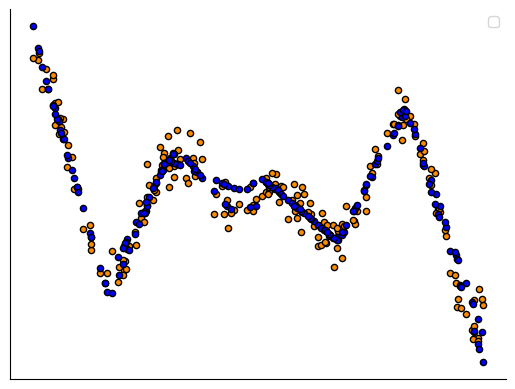

In [29]:
#Prediction:
prediction = cross_val_predict(estimator,X_test,y_test, cv= cv)

plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange")
plt.scatter(X_test, prediction, s=20, edgecolor="black", c="blue")

plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()